In [72]:
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from IPython.display import display

In [18]:
def make_plot(results):

    sizes = list(set([result[3] for result in results]))
    sizes.sort()
    fig, axs = plt.subplots(1,len(sizes), figsize=(28,6))
        
    fig.suptitle(results[0][2])
    
    for i in range(len(sizes)):
       
        relevant_results = [result for result in results if result[3] == sizes[i]]

        axs[i].set_title(f"size {sizes[i]}")

        legend = []

        for result in relevant_results:
            axs[i].plot(result[0]['average'])
            legend.append(result[1])
        axs[i].legend(legend)
        axs[i].set(xlabel="iterations")


## Grid search results

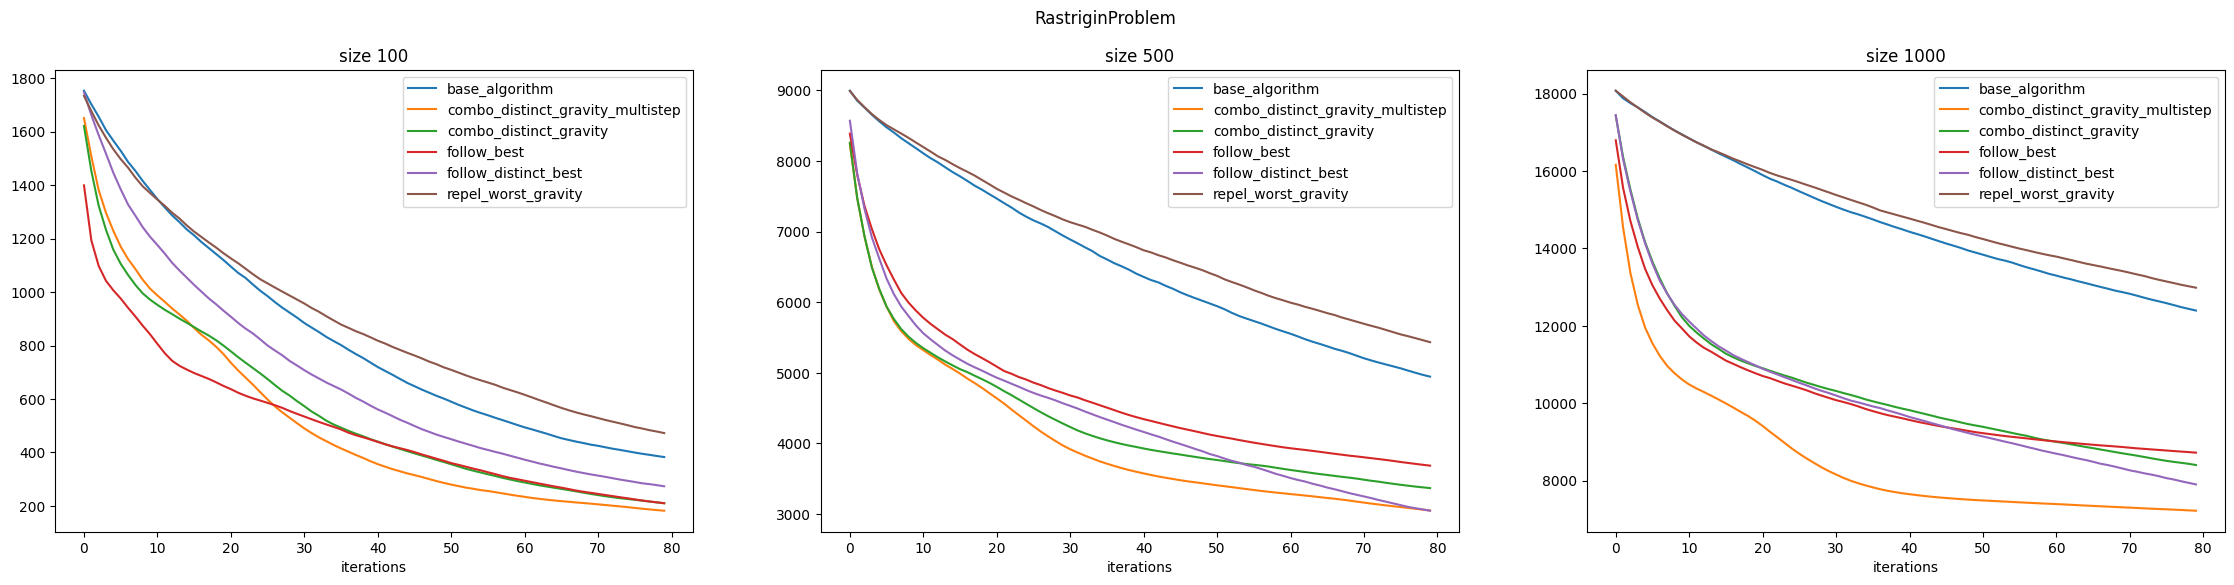

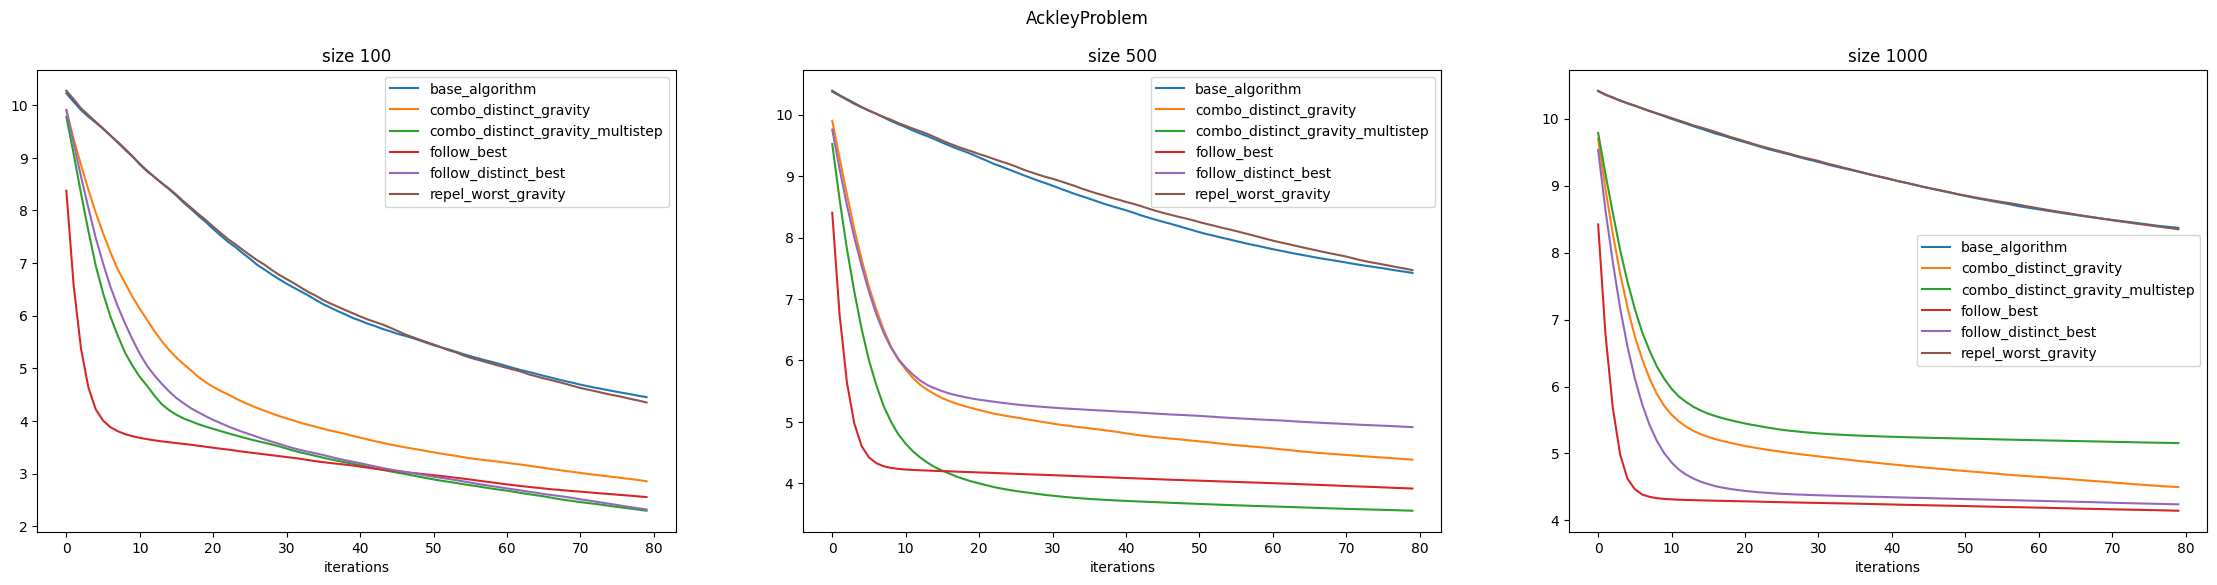

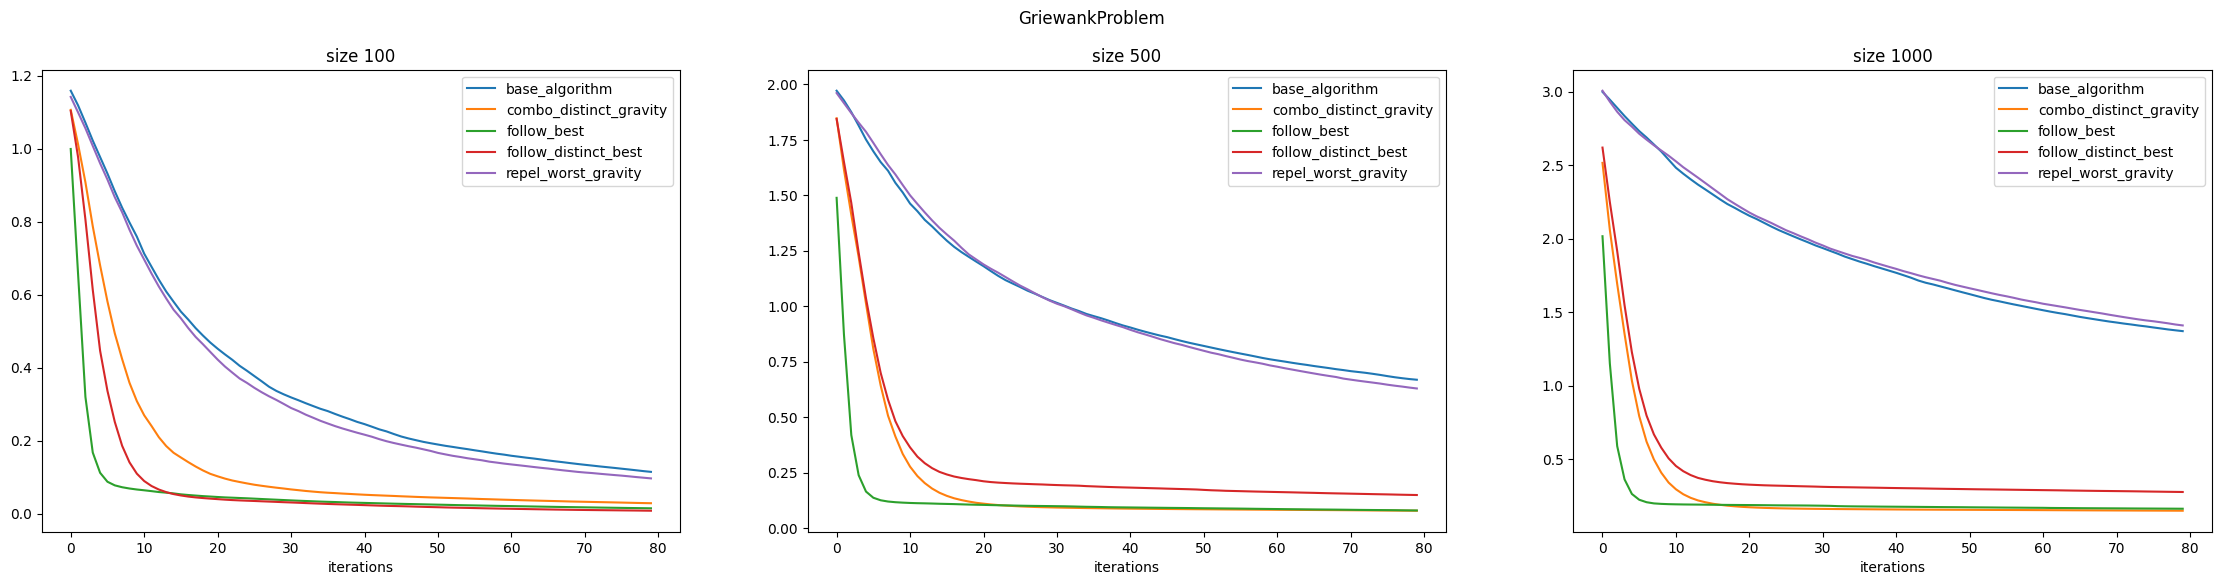

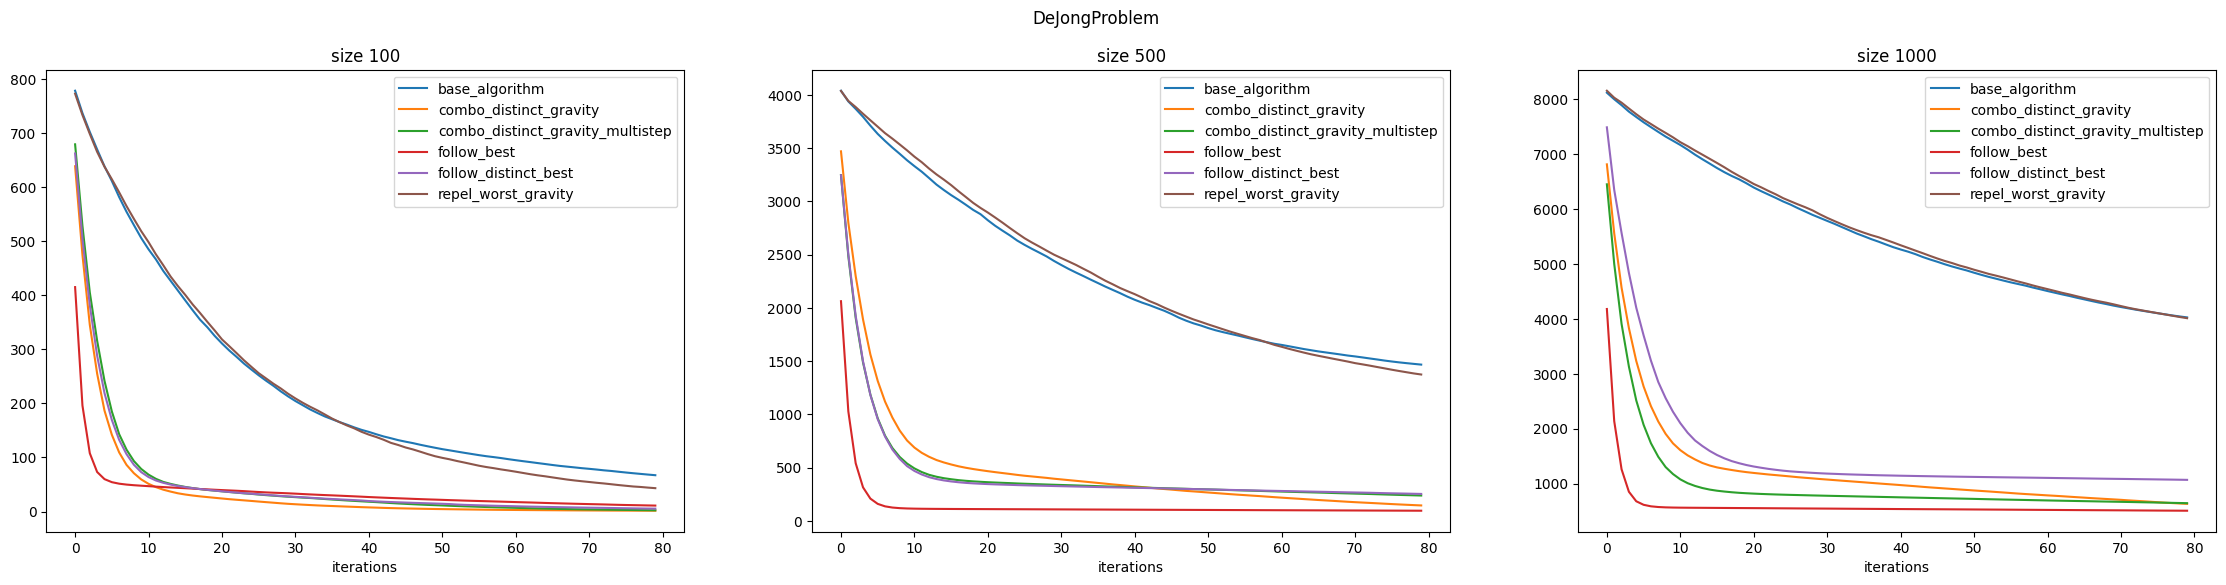

In [27]:
result_files = os.listdir('results')

results = []

for filename in result_files:
    if os.path.isfile(f'results/{filename}'):
        with open(f'results/{filename}','r') as file:
            result = json.loads(file.read())
            
            alg_name = re.search(r'(.*)_[^_]*_[^_]*\.json',filename).group(1)
            
            problem_name = re.search(r'.*_([^_]*)_[^_]*\.json',filename).group(1)
            
            problem_size = int(re.search(r'.*_[^_]*_([^_]*)\.json',filename).group(1))

            results.append((result, alg_name, problem_name, problem_size))
        
        
problems = set(map(lambda x: x[2], results))
              
for problem in problems:
    make_plot([result for result in results if result[2] == problem])

In [63]:
kwargs_dir = Path("results/kwargs/")

hiperparams = {}

for f in kwargs_dir.iterdir():
    
    m = re.match(pattern="(.*)_([^_]+)_(\d+)", string=f.stem)
    alg_name, problem_name, problem_size = m.groups()
    
    kwargs = json.loads(f.read_text())
    
    if hiperparams.get(alg_name) is None:
        hiperparams[alg_name] = []
    
    data_row = {
        "problem_name": problem_name,
        "problem_size": problem_size,
        **kwargs
    }
    hiperparams[alg_name].append(data_row)

In [75]:
for k, v in hiperparams.items():
    hiperparams[k] = pd.DataFrame(v)
    print(k)
    display(hiperparams[k])

combo_distinct_gravity


,problem_name,problem_size,follow_probability,tracked_best_count,copy_genes_alpha,follow_rate,repel_probability,tracked_worst_count,repel_rate
0,AckleyProblem,100,1.0,1,1,0.1,0.4,1,0.1
1,AckleyProblem,1000,1.0,10,1,0.5,1.0,100,0.1
2,AckleyProblem,500,1.0,5,1,0.5,1.0,10,0.1
3,DeJongProblem,100,1.0,10,1,0.5,0.4,100,0.1
4,DeJongProblem,1000,1.0,5,1,0.5,1.0,10,0.1
5,DeJongProblem,500,1.0,5,1,0.5,1.0,10,0.1
6,GriewankProblem,100,1.0,1,1,0.1,0.4,1,0.1
7,GriewankProblem,1000,1.0,100,1,0.5,0.4,1,0.1
8,GriewankProblem,500,1.0,100,1,0.5,0.4,1,10.0
9,RastriginProblem,100,1.0,10,1,0.5,0.4,10,0.1


combo_distinct_gravity_multistep


,problem_name,problem_size,follow_probability,tracked_best_count,copy_genes_alpha,follow_rate,repel_probability,tracked_worst_count,repel_rate
0,AckleyProblem,100,1,5,1,0.5,0.4,100,0.1
1,AckleyProblem,1000,1,5,1,0.2,0.4,10,1.0
2,AckleyProblem,500,1,100,1,0.5,0.4,10,0.1
3,DeJongProblem,100,1,5,1,0.5,0.4,10,0.1
4,DeJongProblem,1000,1,10,1,0.5,0.4,10,0.1
5,DeJongProblem,500,1,10,1,0.5,0.4,10,0.1
6,RastriginProblem,100,1,5,1,0.5,0.4,10,0.1
7,RastriginProblem,1000,1,100,1,0.5,0.4,10,0.1
8,RastriginProblem,500,1,10,1,0.5,0.4,10,0.1


follow_best


,problem_name,problem_size,probability,tracked_best_count,follow_rate
0,AckleyProblem,100,1,10,0.5
1,AckleyProblem,1000,1,10,0.5
2,AckleyProblem,500,1,10,0.5
3,DeJongProblem,100,1,5,0.5
4,DeJongProblem,1000,1,10,0.5
5,DeJongProblem,500,1,100,0.5
6,GriewankProblem,100,1,5,0.5
7,GriewankProblem,1000,1,10,0.5
8,GriewankProblem,500,1,10,0.5
9,RastriginProblem,100,1,10,0.5


follow_distinct_best


,problem_name,problem_size,probability,tracked_best_count,copy_genes_alpha,follow_rate
0,AckleyProblem,100,0.4,100,1,0.5
1,AckleyProblem,1000,1.0,100,1,0.5
2,AckleyProblem,500,1.0,5,1,0.2
3,DeJongProblem,100,1.0,5,1,0.5
4,DeJongProblem,1000,0.4,5,1,0.2
5,DeJongProblem,500,1.0,10,1,0.5
6,GriewankProblem,100,1.0,10,1,0.5
7,GriewankProblem,1000,1.0,10,1,0.5
8,GriewankProblem,500,1.0,5,1,0.5
9,RastriginProblem,100,0.1,10,1,0.5


repel_worst_gravity


,problem_name,problem_size,probability,tracked_worst_count,repel_rate
0,AckleyProblem,100,1.0,10,0.1
1,AckleyProblem,1000,0.4,1,0.1
2,AckleyProblem,500,1.0,10,0.1
3,DeJongProblem,100,1.0,1,0.1
4,DeJongProblem,1000,0.4,10,0.1
5,DeJongProblem,500,0.4,1,0.1
6,GriewankProblem,100,0.4,1,0.1
7,GriewankProblem,1000,0.4,100,0.1
8,GriewankProblem,500,0.4,1,0.1
9,RastriginProblem,100,0.4,100,0.1


## Last results

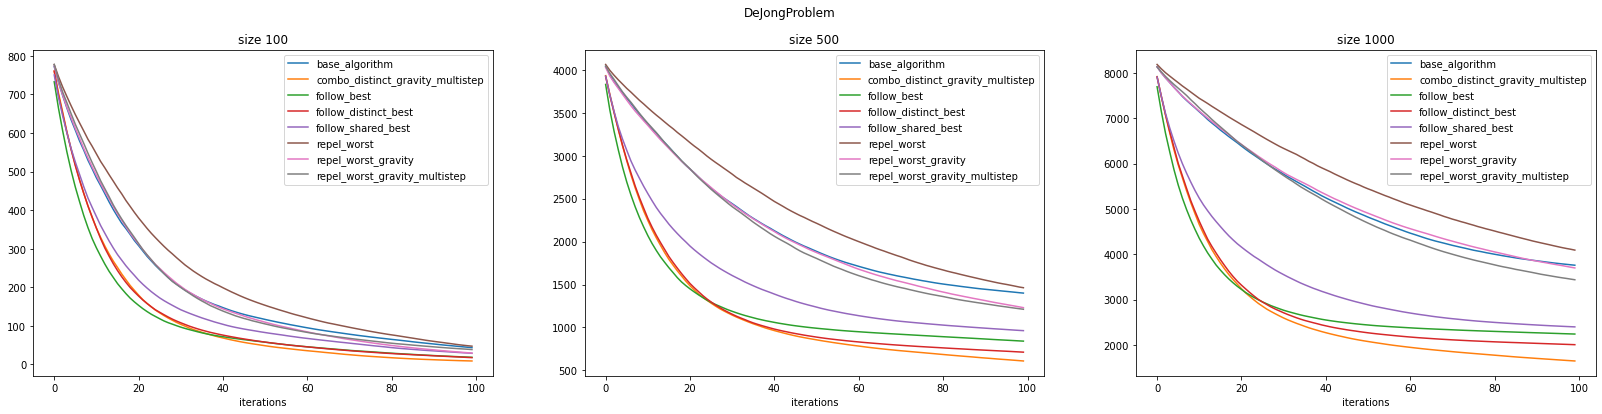

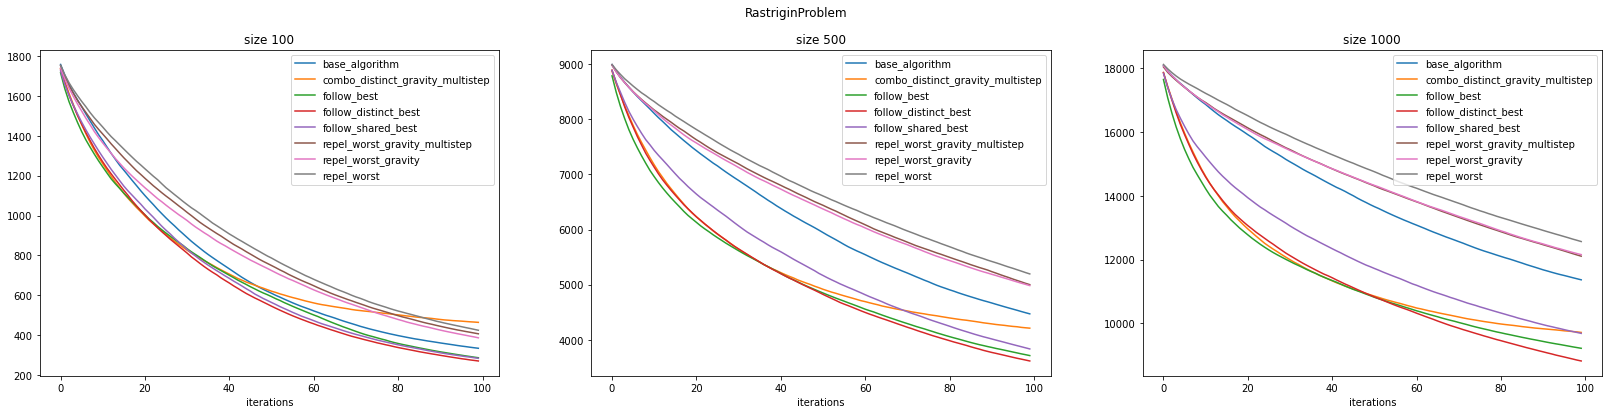

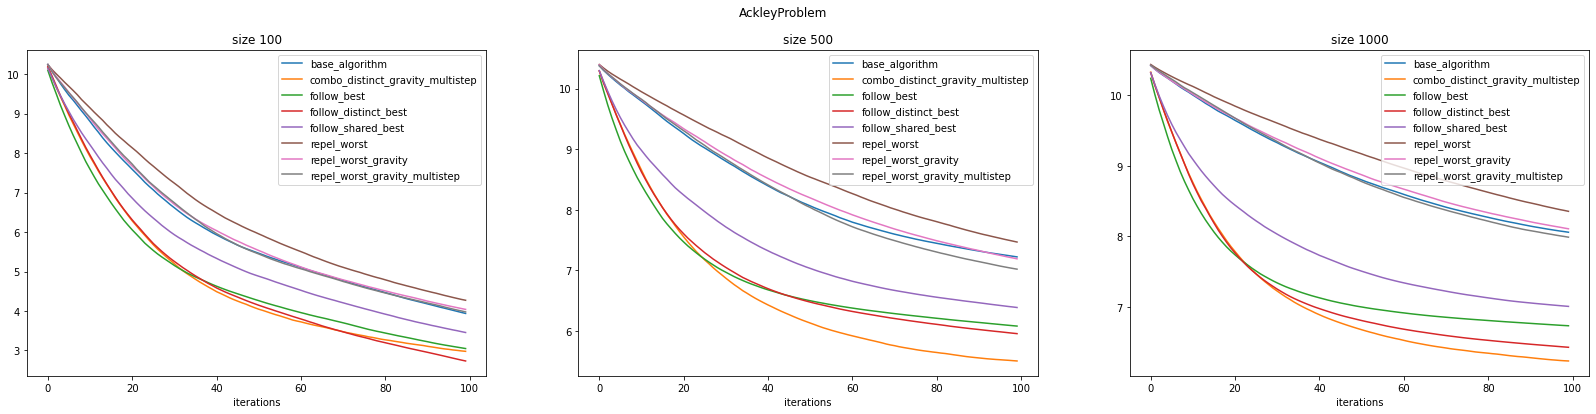

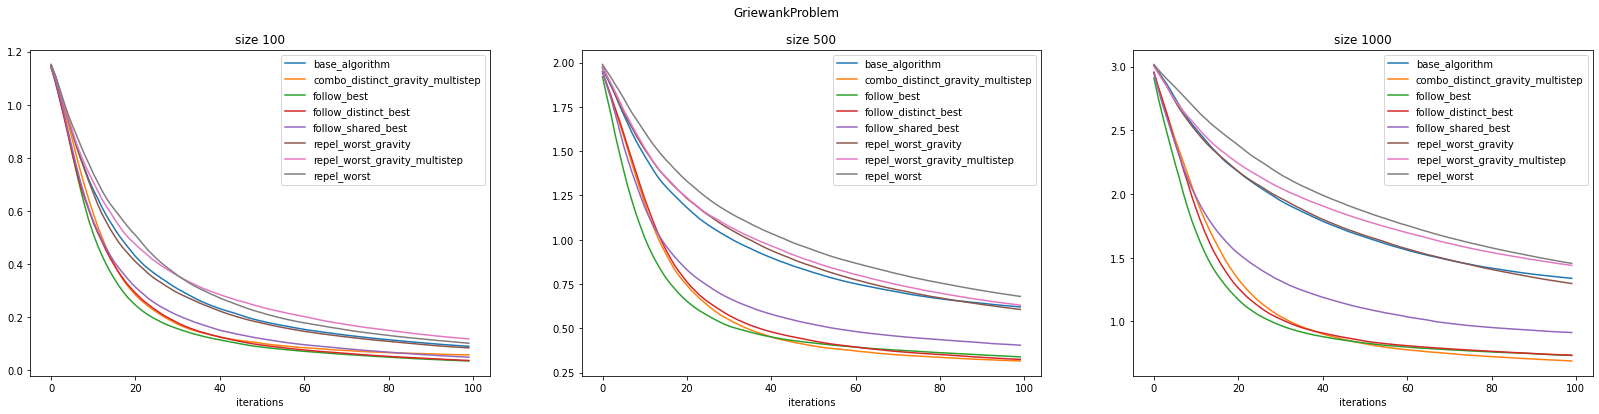

In [ ]:
result_files = os.listdir('results')

results = []

for filename in result_files:
    with open(f'results/{filename}','r') as file:
        result = json.loads(file.read())
        
        alg_name = re.search(r'(.*)_[^_]*_[^_]*\.json',filename).group(1)
        
        problem_name = re.search(r'.*_([^_]*)_[^_]*\.json',filename).group(1)
        
        problem_size = int(re.search(r'.*_[^_]*_([^_]*)\.json',filename).group(1))

        results.append((result, alg_name, problem_name, problem_size))
        
        
problems = set(map(lambda x: x[2], results))
              
for problem in problems:
    make_plot([result for result in results if result[2] == problem])